# ARIMA Example

## To add a heading:
- Insert a new cell
- Type or paste-in content
- Place a single / just one "pound-sign" in front of the heading content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add a sub-heading:
- Insert a new cell
- Type or paste-in content
- Place two "pound-signs" in front of the sub-heading
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add new bulleted documentation:

- Insert a new cell
- Type or paste-in content
- Place a "dash" character in front of the bulleted content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## References
- http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
- http://people.duke.edu/~rnau/whatuse.htm
- http://people.duke.edu/~rnau/arimrule.htm

## Import Libraries

In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

#Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

#ACF and PACF Functions:
from statsmodels.tsa.stattools import acf, pacf

#Date management tools
from pandas.core import datetools

#ARIMA model
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6


# Helper Functions
## Function: test_stationarity(name of time series)

In [61]:
def test_stationarity(timeseries):
    #determine rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window=12,center=False).mean()
    #rolstd  = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=12,center=False).std()
    
    #Plot Rolling Stats
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std  = plt.plot(rolstd, color='black', label='Rolling StdDev')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Std Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller Test
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

def seasonal_decomposition(timeseries):
    decomposition = seasonal_decompose(timeseries.dropna(inplace=False))

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.tight_layout()

def acf_pacf_plot(timeseries):
    lag_acf = acf(timeseries, nlags=20)
    lag_pacf = pacf(timeseries, nlags=20, method='ols')

    #Plot ACF:
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')

    #Plot PACF:
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()



In [85]:
data = pd.read_csv('C://Users//a1000391//Desktop//timeseries.csv')
#data = pd.read_csv('C://Users//a1000391//Desktop//AirPassengers.csv')
print(data.head())
print('/n Data Types:')
print(data.dtypes)
data.index

         Date   ts  INFLECT
0  2013-02-03  226        0
1  2013-02-10  141        0
2  2013-02-17  222        0
3  2013-02-24  257        0
4  2013-03-03  216        0
/n Data Types:
Date       object
ts          int64
INFLECT     int64
dtype: object


RangeIndex(start=0, stop=318, step=1)

## Reset the dataframe index to be the Date

In [86]:
data["Date"] = pd.to_datetime(data["Date"])
data.set_index(["Date"], drop=True, append=False, inplace=True, verify_integrity=True)

## Confirm Date is now the index for the dataframe

In [87]:
print(data.head)
print('\n Data Types:')
print(data.dtypes)
print(data.index)

<bound method NDFrame.head of              ts  INFLECT
Date                    
2013-02-03  226        0
2013-02-10  141        0
2013-02-17  222        0
2013-02-24  257        0
2013-03-03  216        0
2013-03-10  263        0
2013-03-17  222        0
2013-03-24  157        0
2013-03-31  263        0
2013-04-07  168        0
2013-04-14  130        0
2013-04-21  222        0
2013-04-28  276        0
2013-05-05  274        0
2013-05-12  285        0
2013-05-19  258        0
2013-05-26  271        0
2013-06-02  303        0
2013-06-09  250        0
2013-06-16  301        0
2013-06-23  290        0
2013-06-30  310        0
2013-07-07  239        0
2013-07-14  188        0
2013-07-21  255        0
2013-07-28  311        0
2013-08-04  292        0
2013-08-11  312        0
2013-08-18  333        0
2013-08-25  326        0
...         ...      ...
2018-08-12  778        1
2018-08-19  847        1
2018-08-26  824        1
2018-09-02  802        1
2018-09-09  826        1
2018-09-16  782     

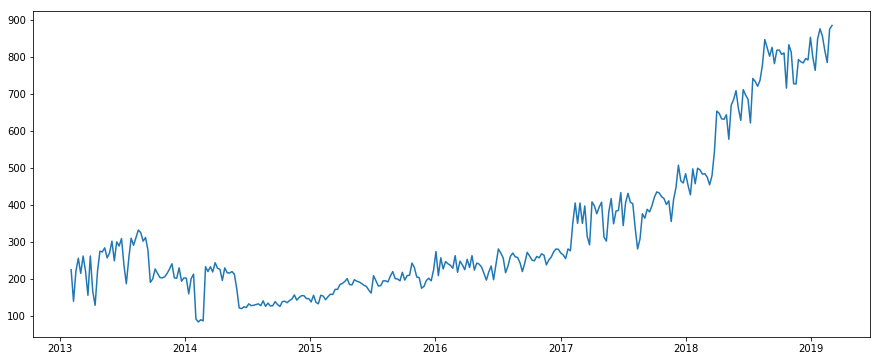

In [88]:
plt.plot(data.ts)

## Test time series for Stationarity (unit roots)

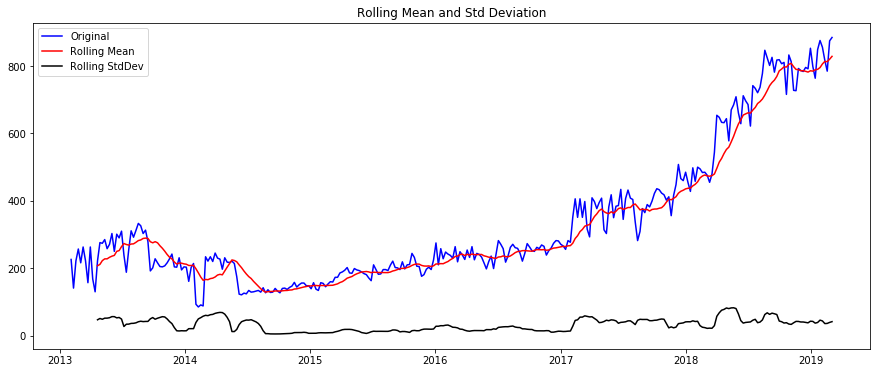

Results of Dickey-Fuller Test
Test Statistic                   1.899241
p-value                          0.998527
#Lags Used                       7.000000
Number of Observations Used    310.000000
Critical Value (1%)             -3.451622
Critical Value (5%)             -2.870909
Critical Value (10%)            -2.571762
dtype: float64


In [89]:
test_stationarity(data.ts)

## Stationarity Tests - First Difference

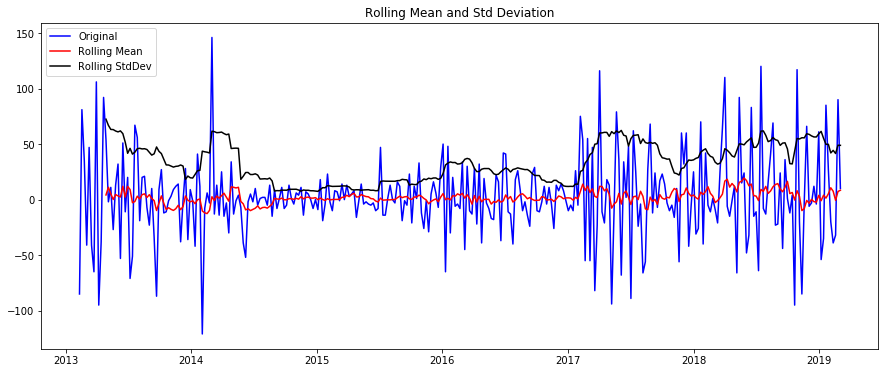

Results of Dickey-Fuller Test
Test Statistic                -9.563416e+00
p-value                        2.392123e-16
#Lags Used                     5.000000e+00
Number of Observations Used    3.110000e+02
Critical Value (1%)           -3.451553e+00
Critical Value (5%)           -2.870879e+00
Critical Value (10%)          -2.571746e+00
dtype: float64


In [92]:
data['first_difference'] = data.ts - data.ts.shift(1)
test_stationarity(data.first_difference.dropna(inplace=False))

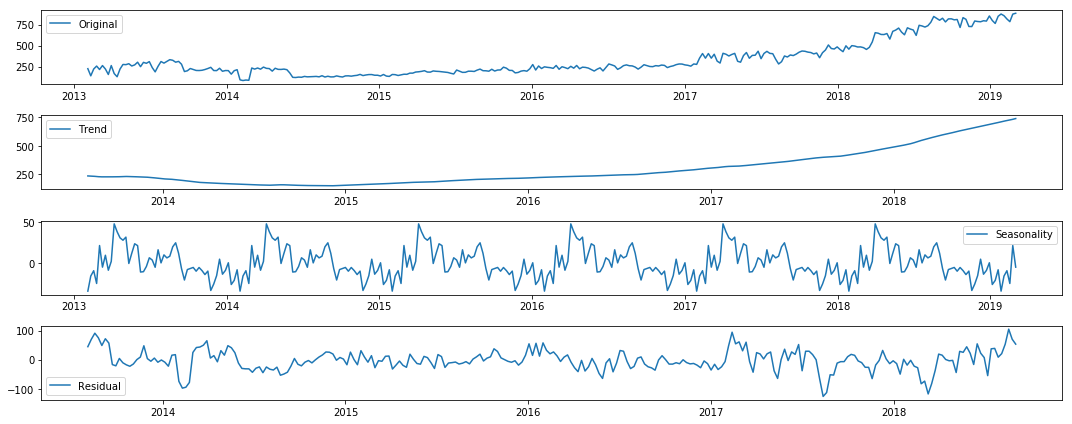

In [93]:
seasonal_decomposition(data.ts)

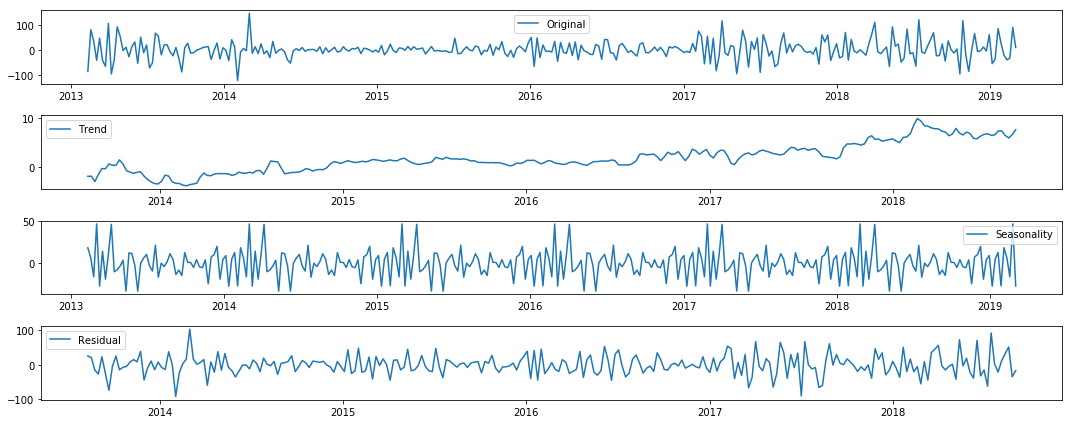

In [94]:
seasonal_decomposition(data.first_difference)

# Identification

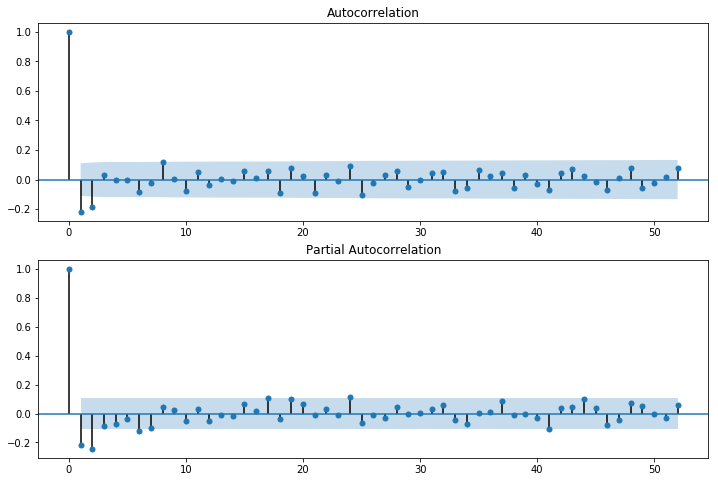

In [95]:
# Note: You must take data from 2nd-observation-on because we took first-difference in the original definition
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.first_difference.iloc[2:], lags=52, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.first_difference.iloc[2:], lags=52, ax=ax2)


## Identify the AR portion of the specification
- notice we are not using "first_difference", we are using the level. Handling the differencing in the order=(2,1,0)

                             ARIMA Model Results                              
Dep. Variable:                   D.ts   No. Observations:                  317
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1577.764
Method:                       css-mle   S.D. of innovations             35.090
Date:                Sun, 17 Mar 2019   AIC                           3163.528
Time:                        17:23:34   BIC                           3178.564
Sample:                    02-10-2013   HQIC                          3169.534
                         - 03-03-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0789      1.274      1.632      0.104      -0.417       4.575
ar.L1.D.ts    -0.2894      0.055     -5.302      0.000      -0.396      -0.182
ar.L2.D.ts    -0.2608      0.055     -4.712      0.0

C:\Users\a1000391\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\a1000391\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\a1000391\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1026: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\a1000391\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1029: FutureWarning: Using a non-tuple sequence 

Text(0.5,1,'RSS: nan')

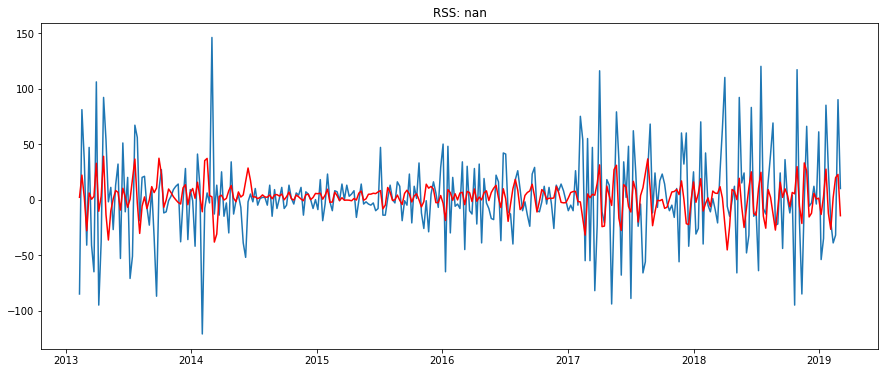

In [111]:
#AR Model
model = ARIMA(data.ts.dropna(), order=(2,1,0))
results_AR = model.fit(disp=-1)
print(results_AR.summary())
plt.plot(data.first_difference)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data.first_difference)**2))


## Identify the MA portion of the specification

                             ARIMA Model Results                              
Dep. Variable:                   D.ts   No. Observations:                  317
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1574.377
Method:                       css-mle   S.D. of innovations             34.712
Date:                Sun, 17 Mar 2019   AIC                           3156.753
Time:                        17:24:57   BIC                           3171.789
Sample:                    02-10-2013   HQIC                          3162.759
                         - 03-03-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0436      0.886      2.306      0.022       0.307       3.781
ma.L1.D.ts    -0.3256      0.056     -5.821      0.000      -0.435      -0.216
ma.L2.D.ts    -0.2223      0.058     -3.845      0.0

C:\Users\a1000391\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\a1000391\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: nan')

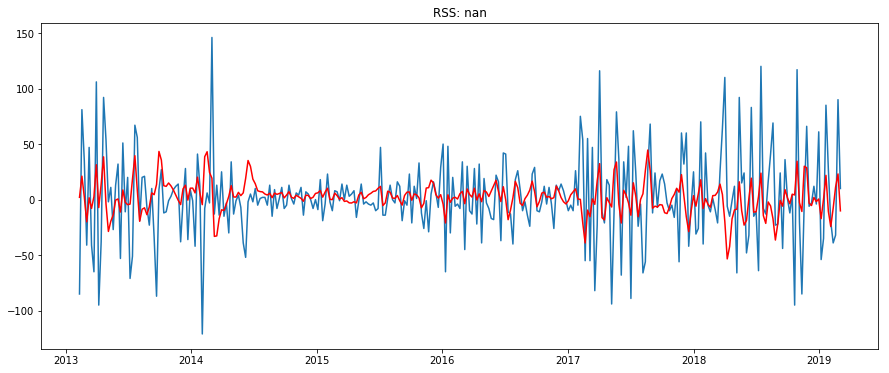

In [115]:
#MA Model
model = ARIMA(data.ts, order=(0,1,2))
results_MA = model.fit(disp=-1)
print(results_MA.summary())
plt.plot(data.first_difference)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-data.first_difference)**2))


## Combine the AR & MA specifications together

                             ARIMA Model Results                              
Dep. Variable:                   D.ts   No. Observations:                  317
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1574.141
Method:                       css-mle   S.D. of innovations             34.686
Date:                Sun, 17 Mar 2019   AIC                           3160.282
Time:                        17:25:14   BIC                           3182.835
Sample:                    02-10-2013   HQIC                          3169.291
                         - 03-03-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0454      0.876      2.335      0.020       0.328       3.763
ar.L1.D.ts    -0.2641      0.355     -0.745      0.457      -0.959       0.431
ar.L2.D.ts     0.1156      0.207      0.558      0.5

C:\Users\a1000391\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\a1000391\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: nan')

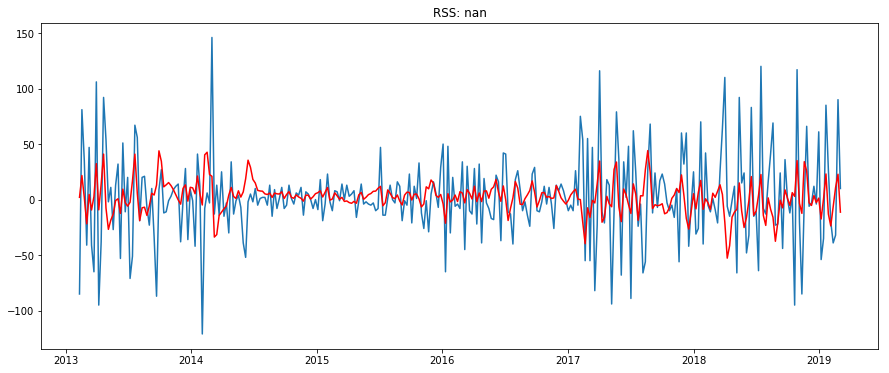

In [116]:
#Combined Model
model = ARIMA(data.ts, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.summary())
plt.plot(data.first_difference)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data.first_difference)**2))


## What about exogenous variables?

C:\Users\a1000391\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\a1000391\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D.ts   No. Observations:                  317
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1570.888
Method:                       css-mle   S.D. of innovations             34.326
Date:                Sun, 17 Mar 2019   AIC                           3155.775
Time:                        17:25:56   BIC                           3182.087
Sample:                    02-10-2013   HQIC                          3166.286
                         - 03-03-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6743      0.842      0.801      0.424      -0.975       2.324
INFLECT        4.5367      1.557      2.915      0.004       1.486       7.587
ar.L1.D.ts    -0.4101      0.285     -1.441      0.1

Text(0.5,1,'RSS: 382799.6241')

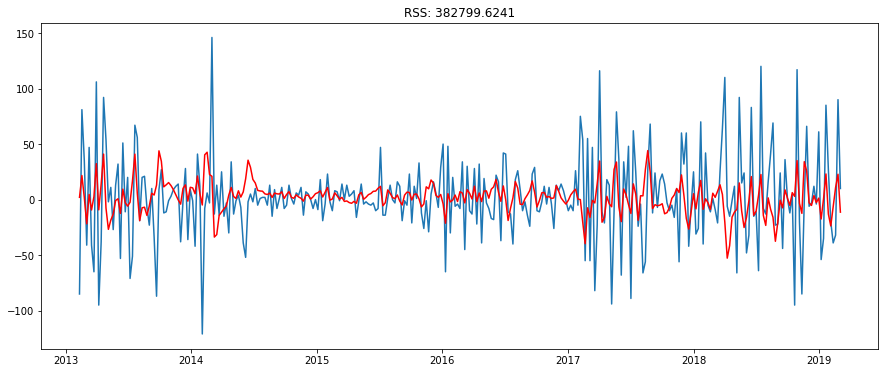

In [118]:
#Combined Model
#exogx = data[["HOLIDAY","INFLECT"]]
exogx = data[["INFLECT"]]

model = ARIMA(data.ts, order=(2,1,2), exog=exogx ) 
results2=model.fit()
print(results2.summary())
plt.plot(data.first_difference)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data.first_difference.dropna(inplace=False))**2))


## Build the Model - What about Seasonal Moving Average?
- Here we started with our basic ARIMA(2,1,2) and added 52 week seasonality
- We removed insignificant lags to reach the specification seen below.

C:\Users\a1000391\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                 ts   No. Observations:                  318
Model:             SARIMAX(2, 1, 2)x(0, 1, 1, 52)   Log Likelihood               -1356.648
Date:                            Sun, 17 Mar 2019   AIC                           2725.297
Time:                                    17:32:01   BIC                           2746.775
Sample:                                02-03-2013   HQIC                          2733.927
                                     - 03-03-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2267      0.375     -0.604      0.546      -0.963       0.509
ar.L2          0.1386      0.231   

Text(0.5,1,'RSS: -1425.1167')

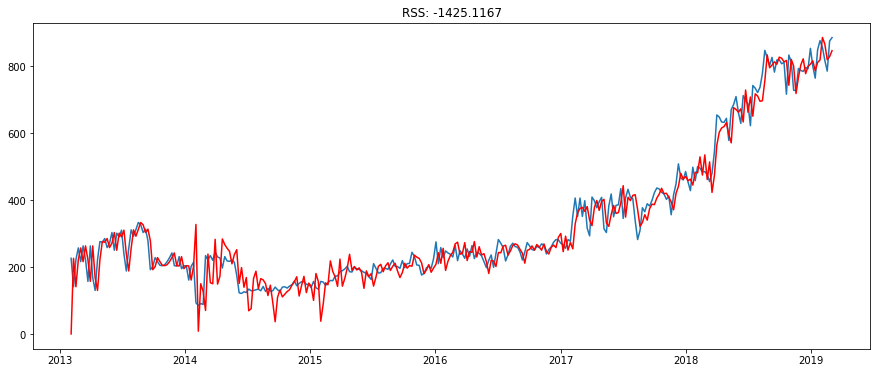

In [120]:
model = sm.tsa.statespace.SARIMAX(data.ts, trend='n', order=(2,1,2), seasonal_order=(0,1,1,52))
results_sarimax = model.fit()
print(results_sarimax.summary())
plt.plot(data.ts)
plt.plot(results_sarimax.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_sarimax.fittedvalues-data.ts)))


## Build forecast: in-sample check

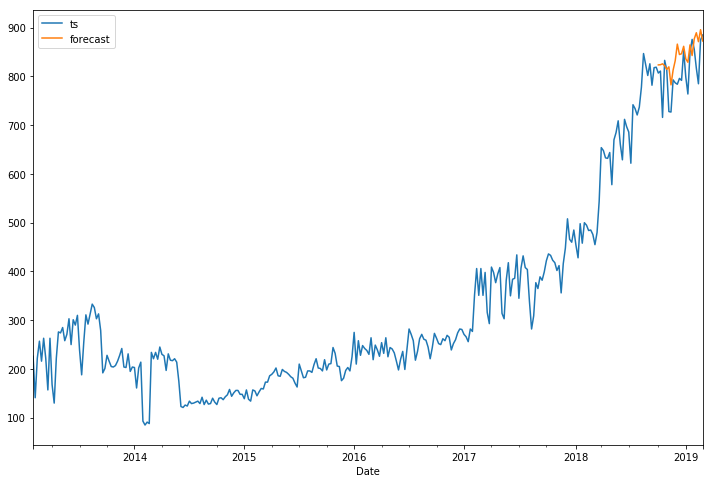

In [122]:
data['forecast'] = results_sarimax.predict(start = "2018-10-07", end = "2019-03-03", dynamic = True)
data[['ts','forecast']].plot(figsize=(12,8))

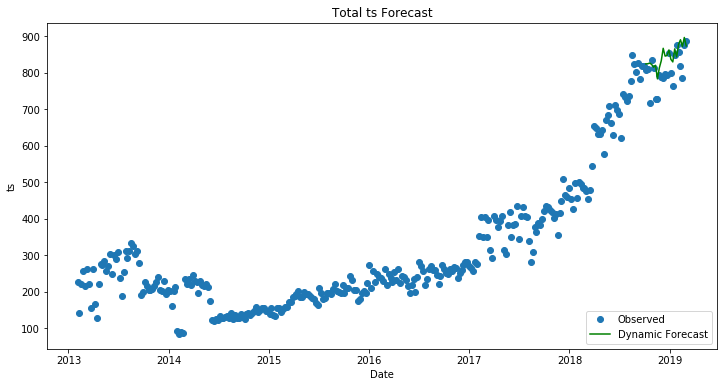

In [123]:
npredict = data.shape[0]
fig, ax = plt.subplots(figsize=(12,6))
npre = 12
ax.set(title='Total ts Forecast', xlabel='Date', ylabel='ts')
ax.plot(data.index[-npredict-npre+1:], data.ix[-npredict-npre+1:, 'ts'], 'o', label='Observed')
ax.plot(data.index[-npredict-npre+1:], data.ix[-npredict-npre+1:, 'forecast'], 'g', label='Dynamic Forecast')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')


# Build Forecast - Out-of-sample forecast

In [133]:
from datetime import datetime
from dateutil.relativedelta import relativedelta  
start = data.shape[0]
start_date = datetime.strptime("2019-03-03", '%Y-%m-%d')
#data_list = [start + x for x in range(0,16)]
#data_list = [start + x for x in range(0,16)], [start_date + relativedelta(weeks=y) for y in range(0,16)]
data_list = [start_date + relativedelta(weeks=y) for y in range(0,16)]
print(data_list)
future = pd.DataFrame(index=data_list, columns=data.columns)
data2 = pd.concat([data, future])


[datetime.datetime(2019, 3, 3, 0, 0), datetime.datetime(2019, 3, 10, 0, 0), datetime.datetime(2019, 3, 17, 0, 0), datetime.datetime(2019, 3, 24, 0, 0), datetime.datetime(2019, 3, 31, 0, 0), datetime.datetime(2019, 4, 7, 0, 0), datetime.datetime(2019, 4, 14, 0, 0), datetime.datetime(2019, 4, 21, 0, 0), datetime.datetime(2019, 4, 28, 0, 0), datetime.datetime(2019, 5, 5, 0, 0), datetime.datetime(2019, 5, 12, 0, 0), datetime.datetime(2019, 5, 19, 0, 0), datetime.datetime(2019, 5, 26, 0, 0), datetime.datetime(2019, 6, 2, 0, 0), datetime.datetime(2019, 6, 9, 0, 0), datetime.datetime(2019, 6, 16, 0, 0)]


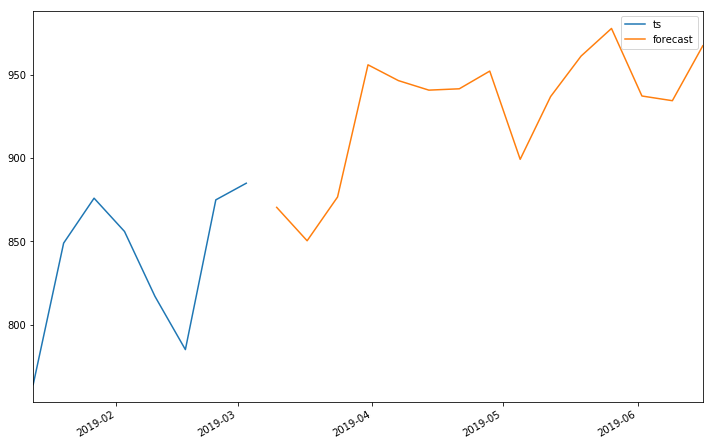

In [134]:
data2['forecast'] = results_sarimax.predict(start = 318, end=333, dynamic=True)
data2[['ts','forecast']].ix[-24:].plot(figsize=(12,8))